## **Importting Libraries & Reading the Dataset**

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## **Data Representation**

In [162]:
# Load the data
df = pd.read_csv('kidney_disease.csv',index_col="id")

In [163]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    object 


In [165]:
df.shape

(400, 25)

### **Column names and it's Description**

0.  id         → Patient ID  
1.  age        → Age of the patient  
2.  bp         → Blood Pressure  
3.  sg         → Specific Gravity (urine concentration)  
4.  al         → Albumin in urine (protein leakage)  
5.  su         → Sugar in urine  
6.  rbc        → Red Blood Cells  
7.  pc         → Pus Cells  
8.  pcc        → Pus Cell Clumps  
9.  ba         → Bacteria in urine  
10. bgr        → Blood Glucose Random (diabetes indicator)  
11. bu         → Blood Urea  
12. sc         → Serum Creatinine  
13. sod        → Sodium  
14. pot        → Potassium  
15. hemo       → Hemoglobin  
16. pcv        → Packed Cell Volume  
17. wc         → White Blood Cell Count  
18. rc         → Red Blood Cell Count  
19. htn        → Hypertension  
20. dm         → Diabetes Mellitus  
21. cad        → Coronary Artery Disease  
22. appet      → Appetite  
23. pe         → Pedal Edema  
24. ane        → Anemia  
25. classification → CKD or Not CKD (Target Variable)  1(Not CKD) 0(CKD)

In [166]:
df.columns = ["age", "blood_pressure", "specific_gravity", "albumin", "sugar", 
              "red_blood_cells", "pus_cell", "pus_cell_clumbs", "bacteria", "blood_glucose_random",
              "blood_urea", "serum_creatinine", "sodium", "potassium", "hemoglobin", "packed_cell_volume", 
              "white_blood_cell_count", "red_blood_cell_count", "hypertension", "diabetes_mellitus", "coronary_artery_disease", 
              "appetite", "peda_edema", "anemia", "classification"]

### **Data Wrangling**

**Check The Data**

In [167]:
df.isna().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       130
white_blood_cell_count     105
potassium                   88
sodium                      87
packed_cell_volume          70
pus_cell                    65
hemoglobin                  52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
pus_cell_clumbs              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anemia                       1
classification               0
dtype: int64

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumbs          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               348 no

In [169]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [170]:
df.duplicated().sum()

np.int64(0)

**Checking The Unique Values for every column**

In [171]:
for col in df.columns:
    print(f'{col} has {df[col].nunique()} values')

age has 76 values
blood_pressure has 10 values
specific_gravity has 5 values
albumin has 6 values
sugar has 6 values
red_blood_cells has 2 values
pus_cell has 2 values
pus_cell_clumbs has 2 values
bacteria has 2 values
blood_glucose_random has 146 values
blood_urea has 118 values
serum_creatinine has 84 values
sodium has 34 values
potassium has 40 values
hemoglobin has 115 values
packed_cell_volume has 44 values
white_blood_cell_count has 92 values
red_blood_cell_count has 49 values
hypertension has 2 values
diabetes_mellitus has 5 values
coronary_artery_disease has 3 values
appetite has 2 values
peda_edema has 2 values
anemia has 2 values
classification has 3 values


**Getting the Categorical and Numerical Columns to adjact them**

In [172]:
cat_cols = [col for col in df.columns if df[col].dtype == "object"] # categoric data
num_cols = [col for col in df.columns if df[col].dtype != "object"] # numeric data

In [173]:
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

red_blood_cells: [nan 'normal' 'abnormal']
pus_cell: ['normal' 'abnormal' nan]
pus_cell_clumbs: ['notpresent' 'present' nan]
bacteria: ['notpresent' 'present' nan]
packed_cell_volume: ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
white_blood_cell_count: ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400

In [174]:
df["packed_cell_volume"] = pd.to_numeric(df["packed_cell_volume"], errors = "coerce")
df["white_blood_cell_count"] = pd.to_numeric(df["white_blood_cell_count"], errors = "coerce")
df["red_blood_cell_count"] = pd.to_numeric(df["red_blood_cell_count"], errors = "coerce")

In [175]:
cat_cols = [col for col in df.columns if df[col].dtype == "object"] # categoric data
num_cols = [col for col in df.columns if df[col].dtype != "object"] # numeric data

In [176]:
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

red_blood_cells: [nan 'normal' 'abnormal']
pus_cell: ['normal' 'abnormal' nan]
pus_cell_clumbs: ['notpresent' 'present' nan]
bacteria: ['notpresent' 'present' nan]
hypertension: ['yes' 'no' nan]
diabetes_mellitus: ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease: ['no' 'yes' '\tno' nan]
appetite: ['good' 'poor' nan]
peda_edema: ['no' 'yes' nan]
anemia: ['no' 'yes' nan]
classification: ['ckd' 'ckd\t' 'notckd']


In [177]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['classification'] = df['classification'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

C:\Users\Abdelrahman Ali\AppData\Local\Temp\ipykernel_1928\1334701903.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [178]:
df['classification'] = df['classification'].map({'ckd': 0, 'not ckd': 1})
df['classification'] = pd.to_numeric(df['classification'], errors='coerce')

In [179]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'classification',"red_blood_cells", "pus_cell", "pus_cell_clumbs", "bacteria", "hypertension", "appetite", "peda_edema", "anemia"]
# Check unique values in categorical columns
for col in cols:
    print(f'{col} has {df[col].unique()} values')

diabetes_mellitus has ['yes' 'no' nan] values
coronary_artery_disease has ['no' 'yes' nan] values
classification has [0 1] values
red_blood_cells has [nan 'normal' 'abnormal'] values
pus_cell has ['normal' 'abnormal' nan] values
pus_cell_clumbs has ['notpresent' 'present' nan] values
bacteria has ['notpresent' 'present' nan] values
hypertension has ['yes' 'no' nan] values
appetite has ['good' 'poor' nan] values
peda_edema has ['no' 'yes' nan] values
anemia has ['no' 'yes' nan] values


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumbs          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               348 no

In [181]:
for col in num_cols:
    print(f'{col} has {df[col].unique()} values')

age has [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] values
blood_pressure has [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] values
specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] values
albumin has [ 1.  4.  2.  3.  0. nan  5.] values
sugar has [ 0.  3.  4.  1. nan  2.  5.] values
blood_glucose_random has [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 115.  89. 297. 

# **Exploratory  Data Analysis**

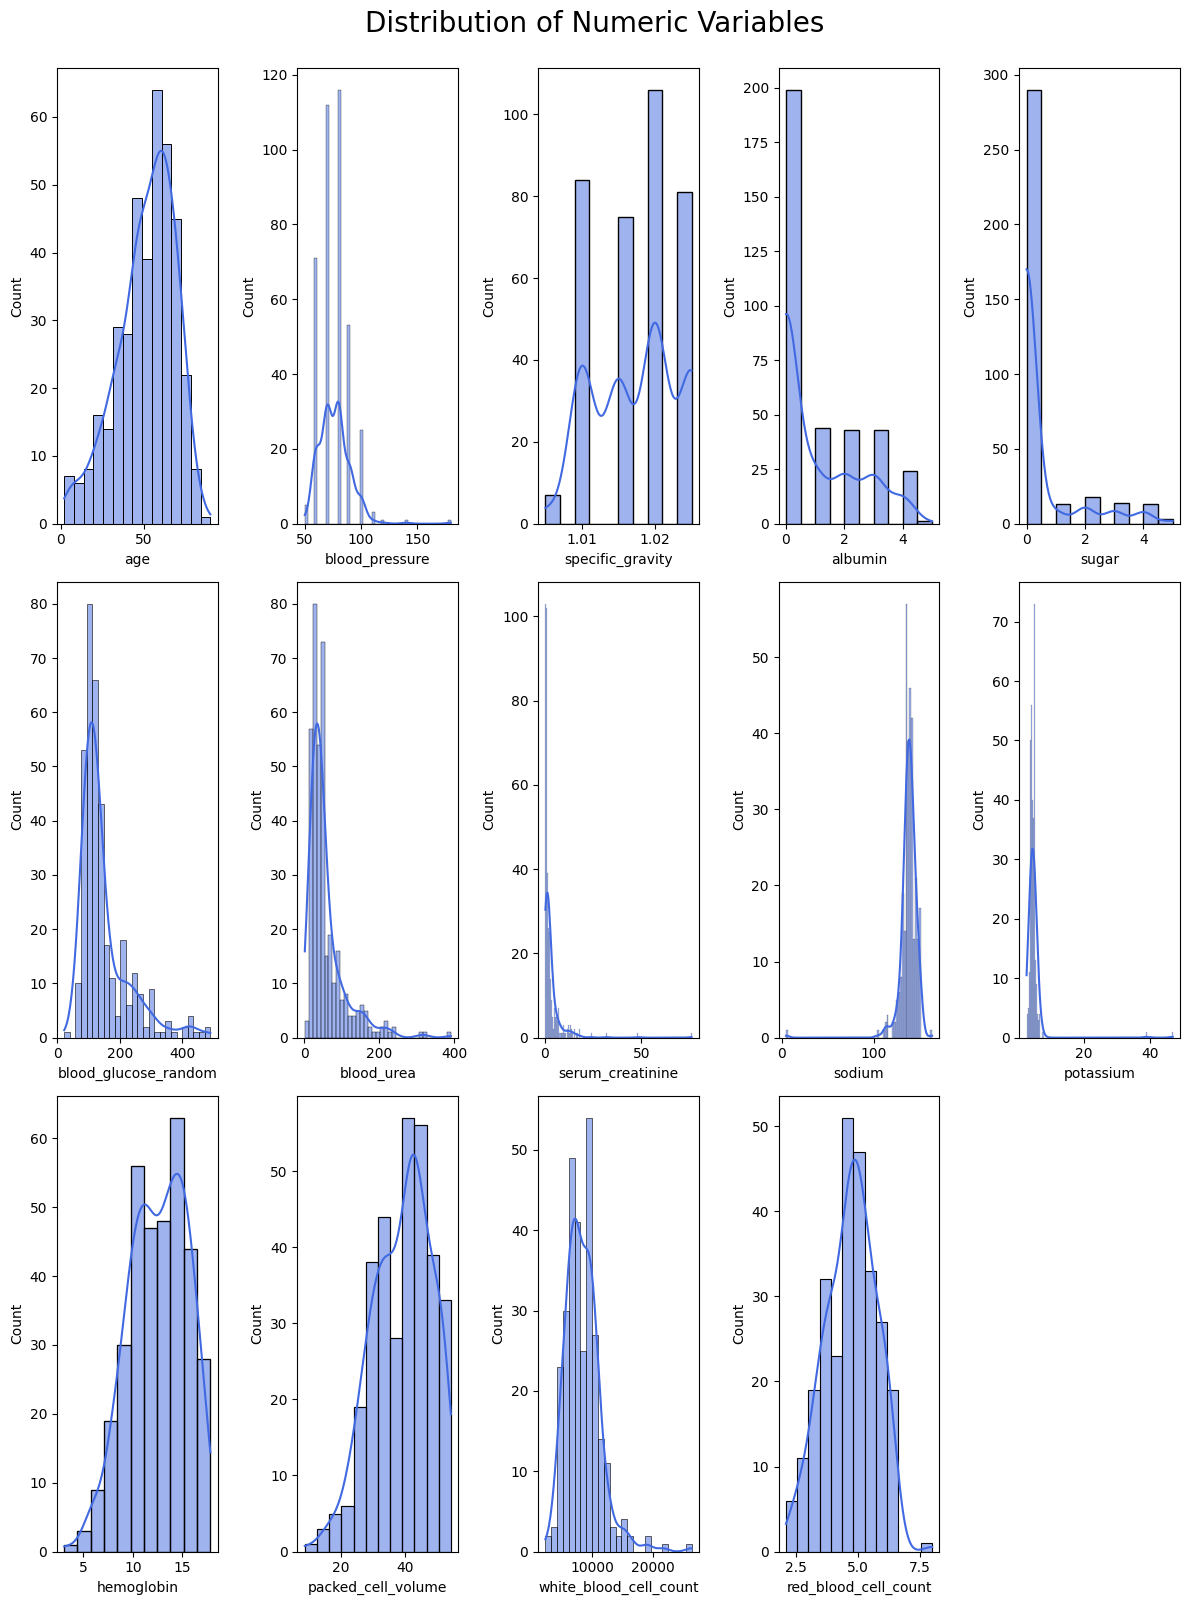

In [182]:
plt.figure(figsize=(12, 16))
plotnumber = 1

for col in num_cols:
    if plotnumber <= len(num_cols):
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(x=df[col], kde=True, color='royalblue')
        plt.xlabel(col)
        
    plotnumber += 1

plt.suptitle('Distribution of Numeric Variables', fontsize=20, y=1)
plt.tight_layout()
plt.show()


In [183]:
fig = px.histogram(df, x="age", color="classification", barmode="group", title="Age Distribution by Classification")
fig.update_layout(xaxis_title="Age", yaxis_title="Count")
fig.show()

In [184]:
fig = make_subplots(rows=(len(cat_cols) // 4) + 1, cols=4, subplot_titles=cat_cols)
row = 1
col = 1
for cat_col in cat_cols:
    counts = df[cat_col].value_counts()
    fig.add_trace(
        go.Bar(
            x=counts.index,
            y=counts.values,
            text=counts.values,
            textposition='auto',
            marker=dict(color='steelblue'),
            name=cat_col
        ),
        row=row,
        col=col
    )
    col += 1
    if col > 4:
        col = 1
        row += 1

fig.update_layout(
    height=800,
    width=1000,
    title_text="Distribution of Categorical Variables",
    showlegend=False
)

fig.show()

In [185]:
def kde(col):
    grid = sns.FacetGrid(df, hue="classification", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

In [186]:
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="classification", template = 'plotly_dark')
    return fig.show()

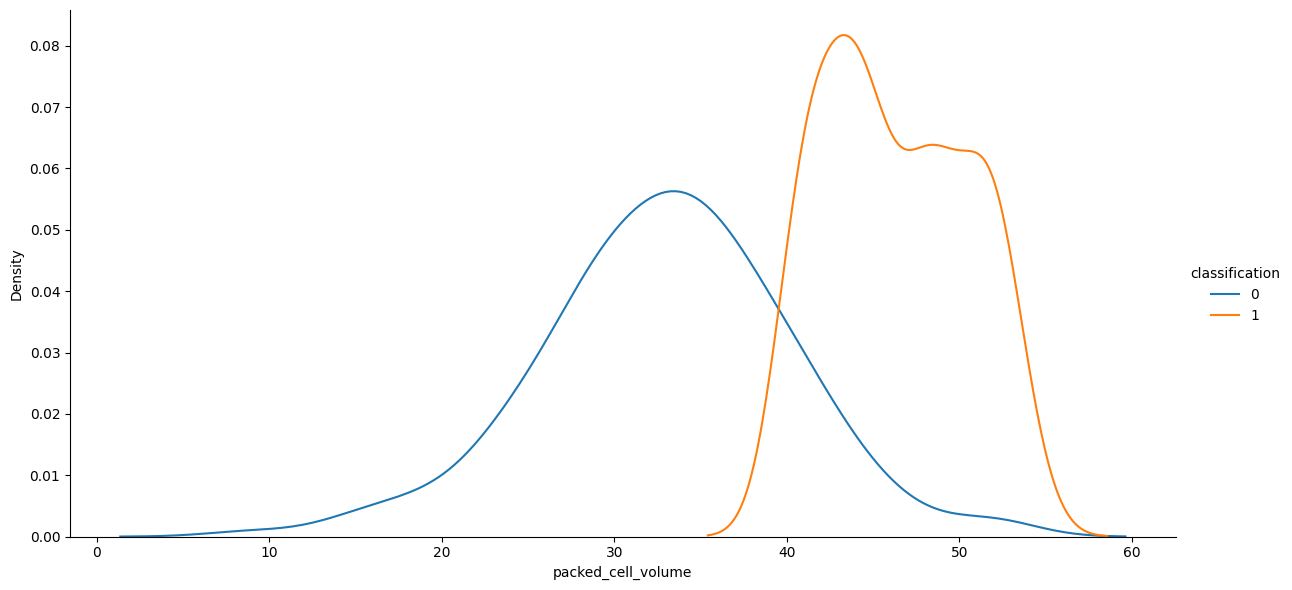

In [187]:
kde('packed_cell_volume')

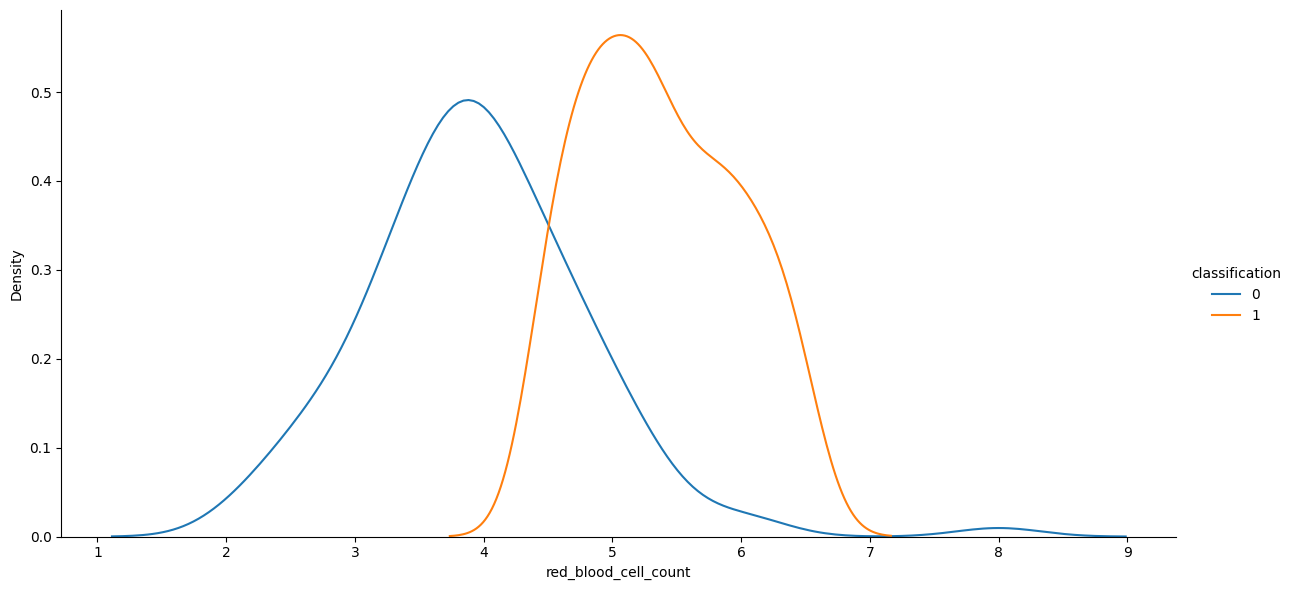

In [188]:
kde('red_blood_cell_count')

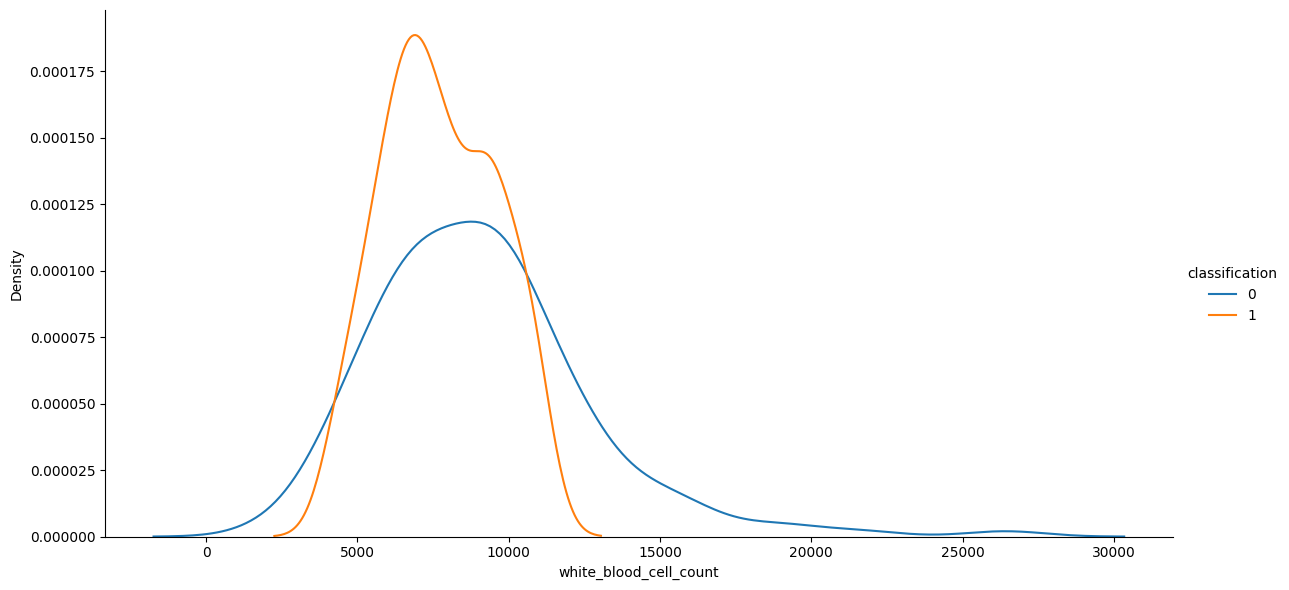

In [189]:
kde('white_blood_cell_count')

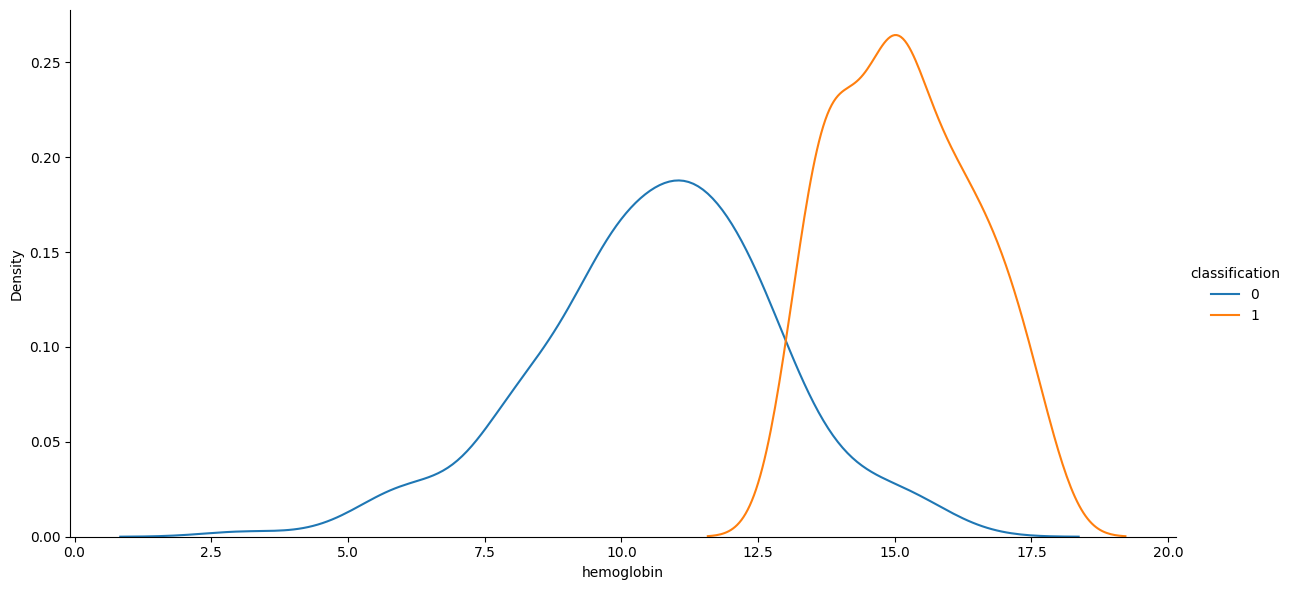

In [190]:
kde('hemoglobin')

In [191]:
px.bar(df, x="specific_gravity", y="packed_cell_volume", color='classification', barmode='group', template = 'plotly_dark', height = 400)

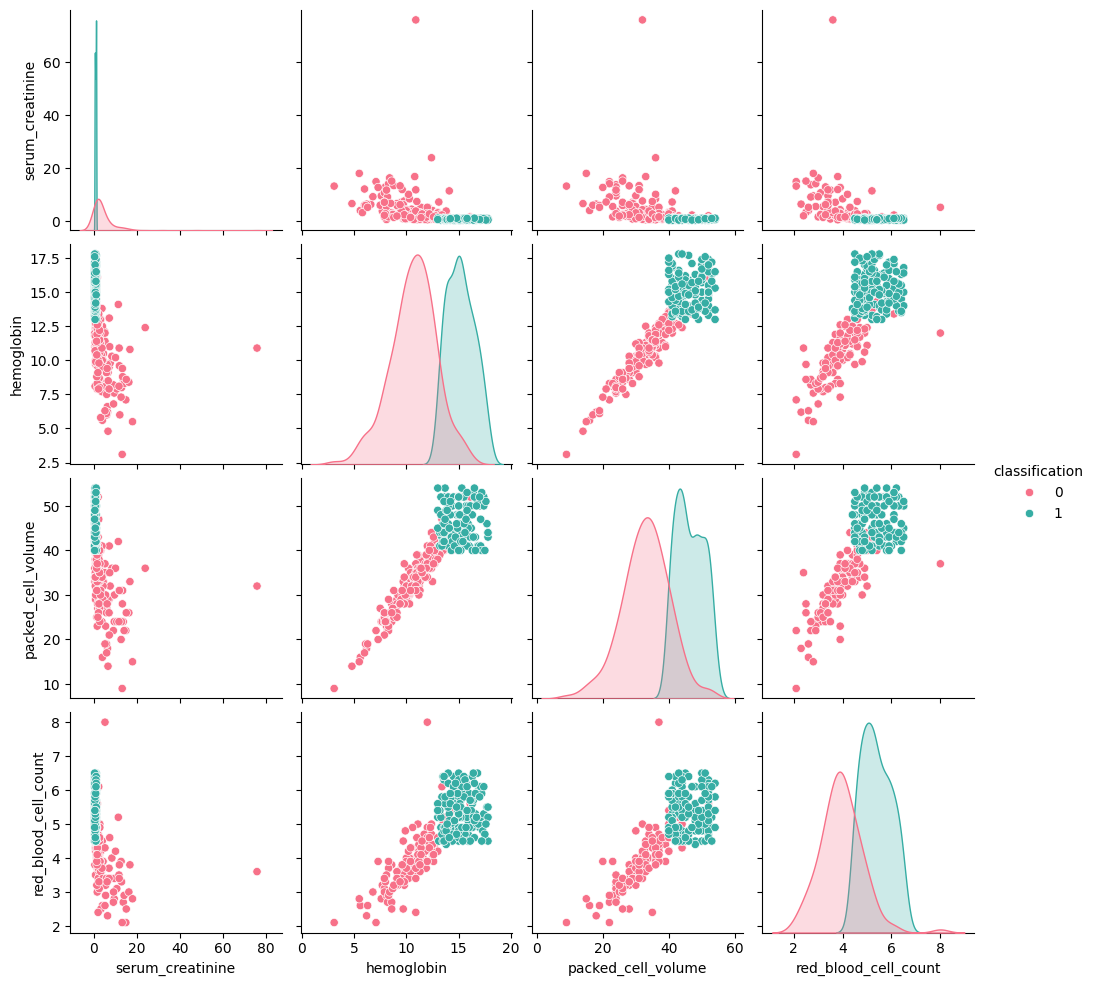

In [192]:
sns.pairplot(df, hue="classification", vars=["serum_creatinine", "hemoglobin", "packed_cell_volume", "red_blood_cell_count"], palette="husl")
plt.show()


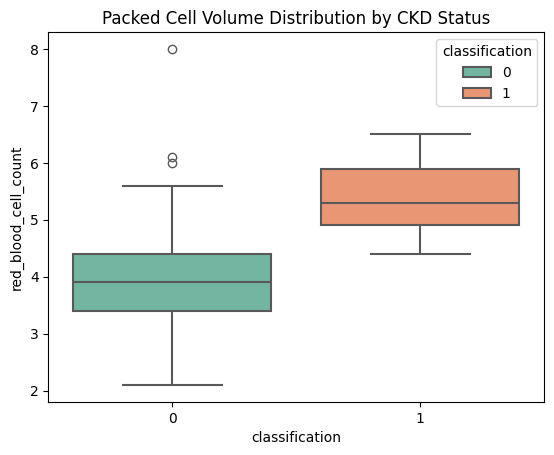

In [193]:
sns.boxplot(x=df["classification"], y=df["red_blood_cell_count"], palette="Set2",hue=df["classification"], linewidth=1.5)
plt.title("Packed Cell Volume Distribution by CKD Status")
plt.show()

In [194]:
scatter('packed_cell_volume', 'red_blood_cell_count')

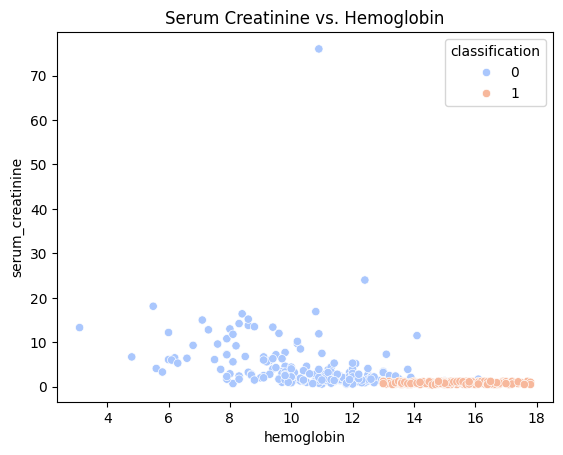

In [195]:
sns.scatterplot(x=df["hemoglobin"], y=df["serum_creatinine"], hue=df["classification"], palette="coolwarm")
plt.title("Serum Creatinine vs. Hemoglobin")
plt.show()


<Axes: xlabel='age', ylabel='blood_pressure'>

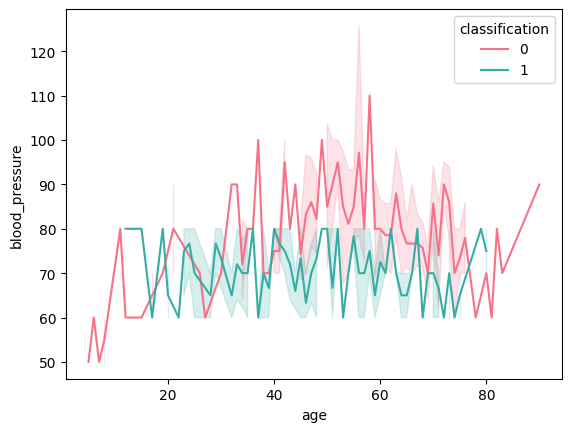

In [196]:
sns.lineplot(x=df["age"], y=df["blood_pressure"], hue=df["classification"], palette="husl") 

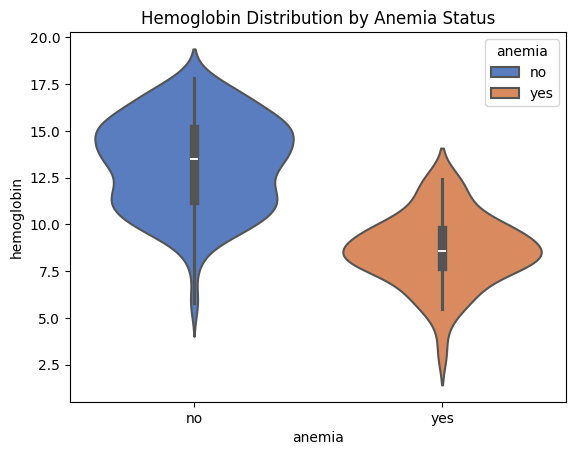

In [197]:
sns.violinplot(x=df["anemia"], y=df["hemoglobin"], palette="muted",hue=df["anemia"], linewidth=1.5)
plt.title("Hemoglobin Distribution by Anemia Status")
plt.show()

<Axes: xlabel='white_blood_cell_count', ylabel='packed_cell_volume'>

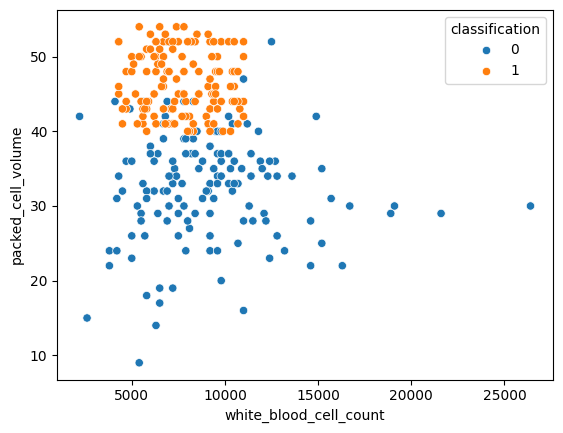

In [198]:
sns.scatterplot(x=df["white_blood_cell_count"], y=df["packed_cell_volume"], hue=df["classification"])

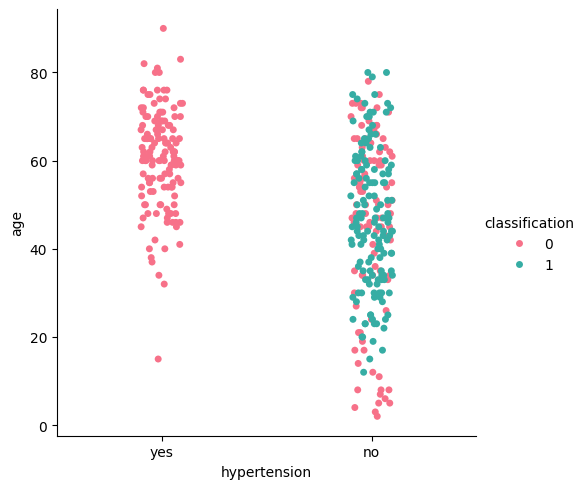

In [199]:
sns.catplot(data=df, x="hypertension", y="age", hue="classification", kind="strip", palette="husl")

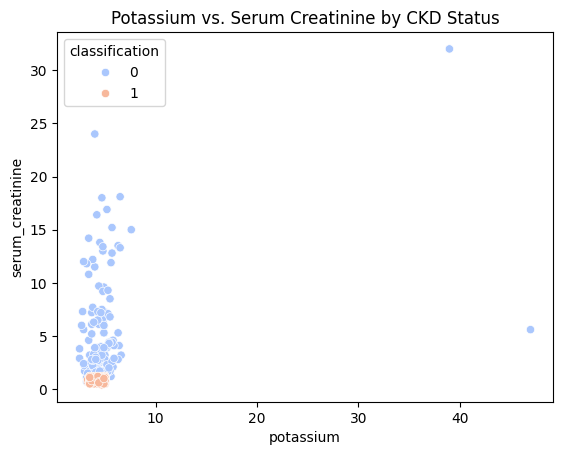

In [200]:
sns.scatterplot(x=df["potassium"], y=df["serum_creatinine"], hue=df["classification"], palette="coolwarm")
plt.title("Potassium vs. Serum Creatinine by CKD Status")
plt.show()


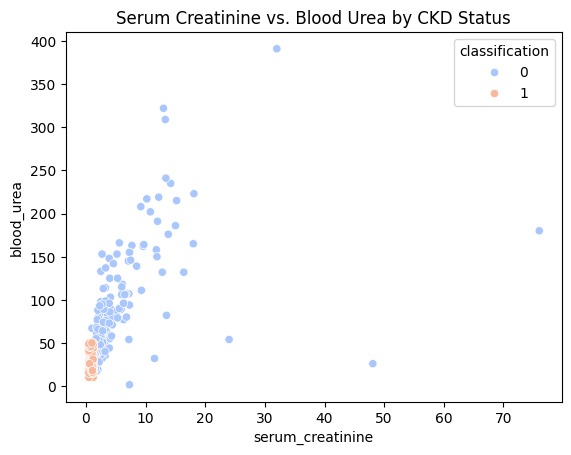

In [201]:
sns.scatterplot(x=df["serum_creatinine"], y=df["blood_urea"], hue=df["classification"], palette="coolwarm")
plt.title("Serum Creatinine vs. Blood Urea by CKD Status")
plt.show()


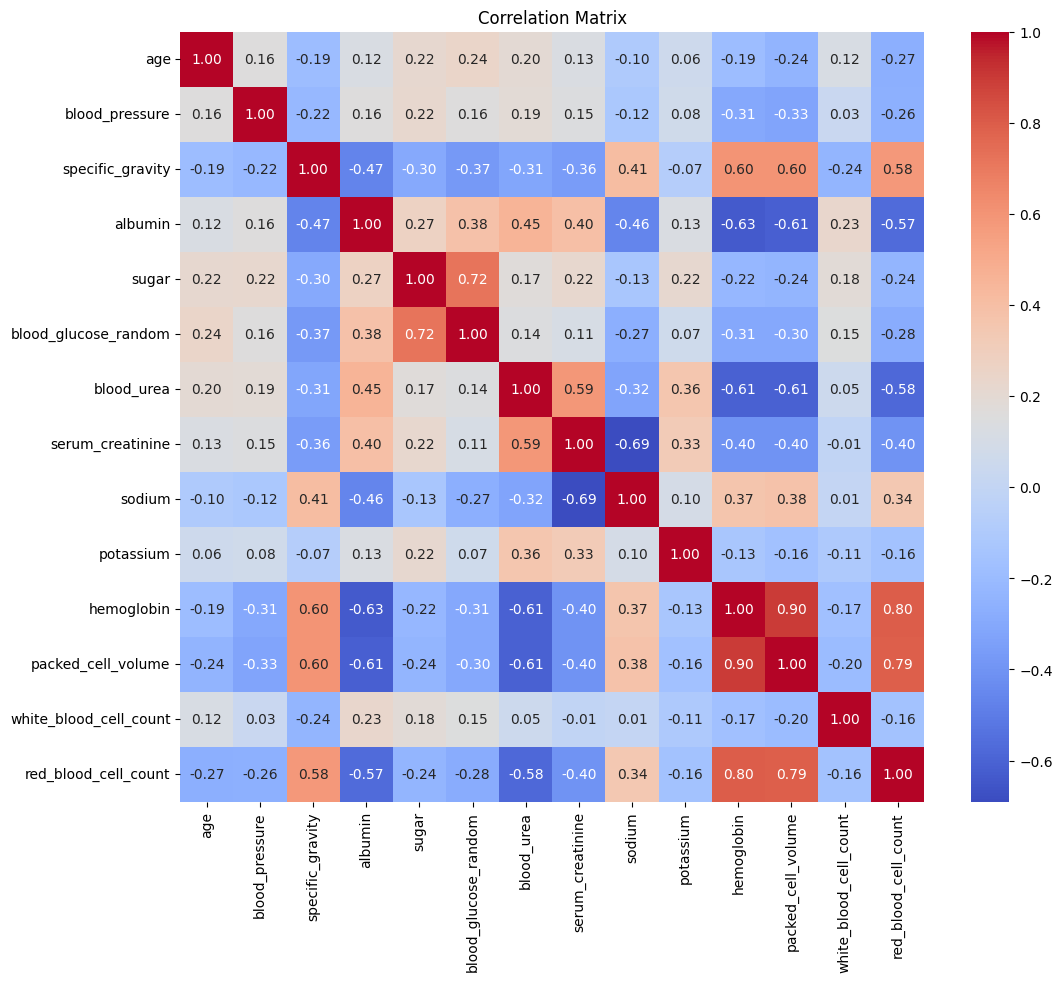

In [202]:
# Compute the correlation matrix
correlation_matrix = df[num_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

#### **Visualiztion of missing columns**

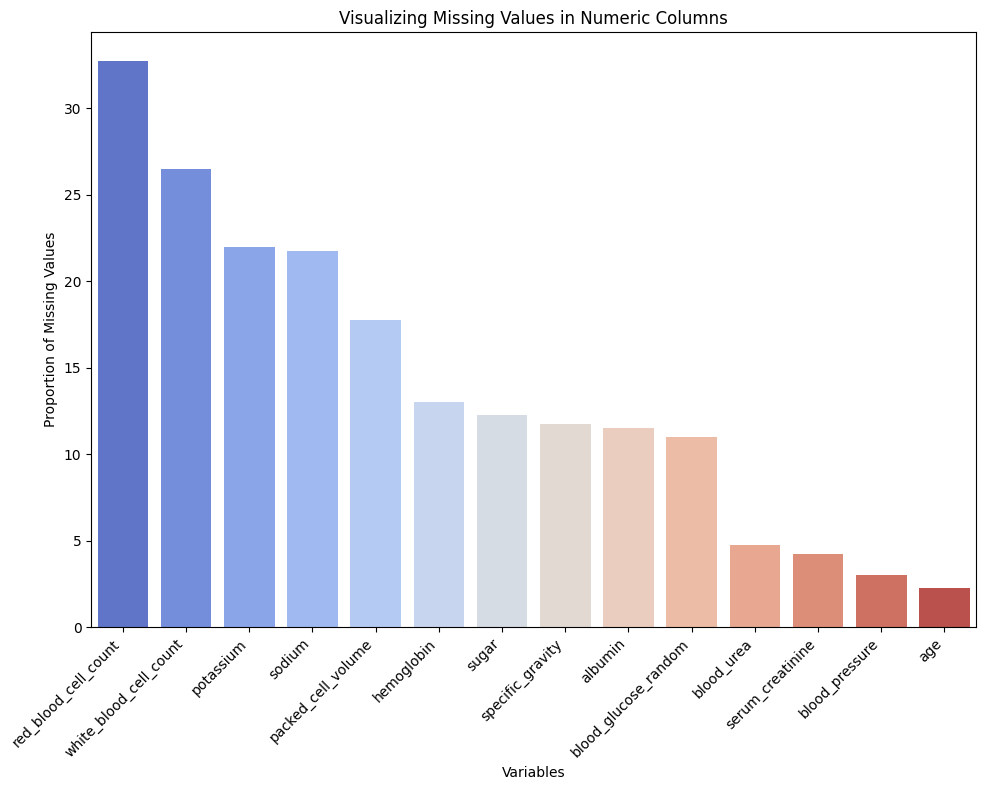

In [203]:
missing_values = (df[num_cols].isna().sum()/df.shape[0]*100).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="coolwarm",hue=missing_values.index,legend=False)
plt.title('Visualizing Missing Values in Numeric Columns')
plt.xlabel('Variables')
plt.ylabel('Proportion of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

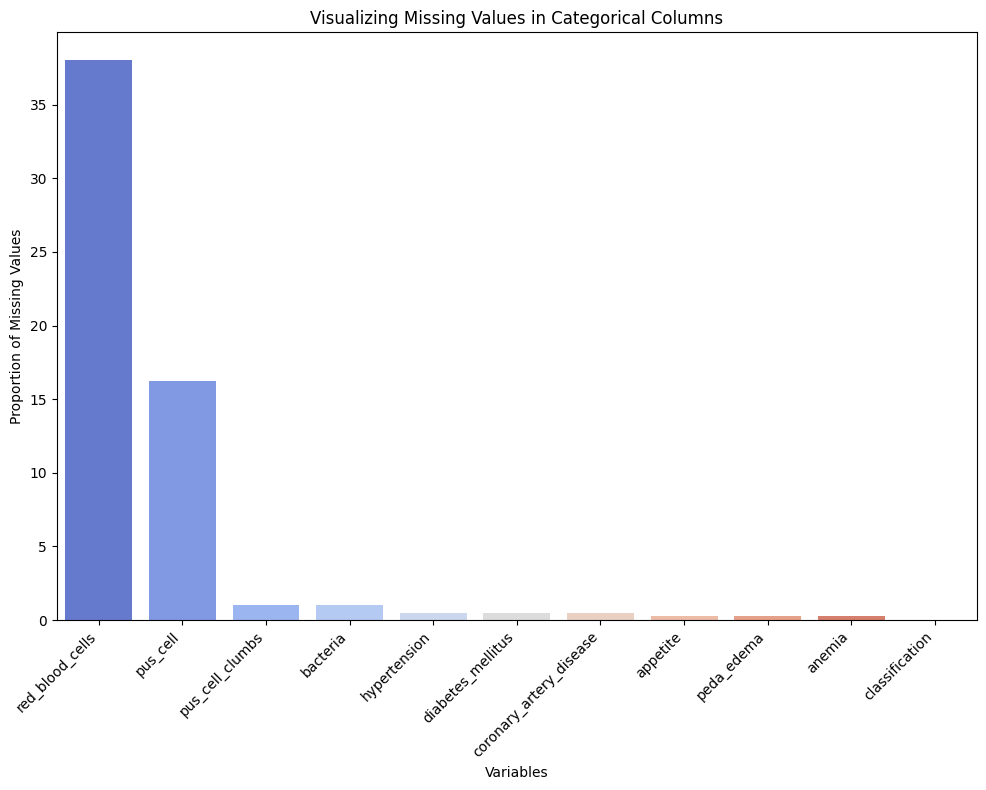

In [204]:
missing_values = (df[cat_cols].isna().sum()/df.shape[0]*100).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="coolwarm",hue=missing_values.index,legend=False)
plt.title('Visualizing Missing Values in Categorical Columns')
plt.xlabel('Variables')
plt.ylabel('Proportion of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Data Preprocessing**

In [205]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [206]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

**Fill missing numerical using KNNimputer**

In [207]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [208]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
classification            0
dtype: int64

In [209]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)
df[cat_cols].isnull().sum()    

red_blood_cells            0
pus_cell                   0
pus_cell_clumbs            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
anemia                     0
dtype: int64

In [210]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumbs has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

anemia has 2 categories



In [211]:
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumbs,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,123.0,...,38.0,6000.0,3.9,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.4,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [212]:
ind_col = [col for col in df.columns if col != 'classification']
dep_col = 'classification'

X = df[ind_col]
y = df[dep_col]

In [213]:
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size=0.2, random_state=82,stratify=y)

In [214]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [215]:
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test ,y_pred)

print(f"Training Accuracy of KNN model is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_accuracy} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")

Training Accuracy of KNN model is 0.8625
Test Accuracy of KNN is 0.6125 

Confusion Matrix :- 
[[26 24]
 [ 7 23]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.79      0.52      0.63        50
           1       0.49      0.77      0.60        30

    accuracy                           0.61        80
   macro avg       0.64      0.64      0.61        80
weighted avg       0.68      0.61      0.62        80



In [216]:
rfc = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'log2', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [217]:
# accuracy score, confusion matrix and classification report of random forest
rd_clf_acc = accuracy_score(y_test, rfc.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rfc.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rfc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rfc.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9875 

Confusion Matrix :- 
[[50  0]
 [ 1 29]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.98        30

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [218]:
# 5-fold cross-validation
cv_scores = cross_val_score(
    rfc, X, y, cv=5, scoring='accuracy'
)

print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.975  0.9875 0.975  0.9875 0.9875]
Average Accuracy: 0.9824999999999999


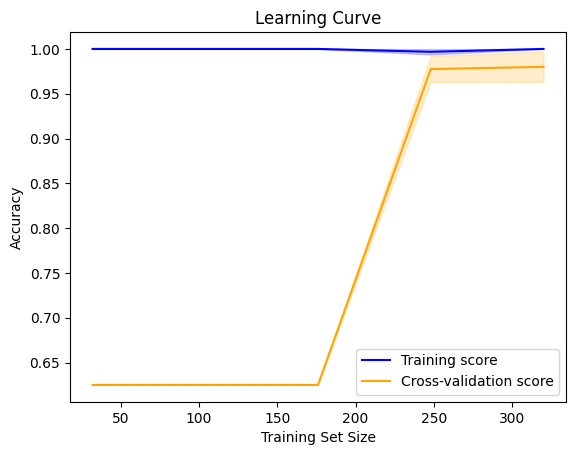

In [219]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rfc, X, y, cv=5, scoring='accuracy', n_jobs=-1)

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="orange")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="orange", alpha=0.2)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

In [220]:
test_data = pd.DataFrame({
    "age": [50, 60],
    "blood_pressure": [80, 90],
    "specific_gravity": [1.02, 1.01],
    "albumin": [1, 2], 
    "sugar": [0, 1],
    "red_blood_cells": [1, 0], 
    "pus_cell": [1, 1], 
    "pus_cell_clumbs": [0, 0], 
    "bacteria": [0, 1], 
    "blood_glucose_random": [120, 150], 
    "blood_urea": [40, 50], 
    "serum_creatinine": [1.2, 1.5], 
    "sodium": [140, 138],
    "potassium": [4.5, 4.8],
    "hemoglobin": [13, 12], 
    "packed_cell_volume": [40, 38],
    "white_blood_cell_count": [8000, 8500], 
    "red_blood_cell_count": [4.5, 4.2], 
    "hypertension": [1, 0], 
    "diabetes_mellitus": [0, 1], 
    "coronary_artery_disease": [0, 1], 
    "appetite": [1, 0], 
    "peda_edema": [0, 1], 
    "anemia": [0, 1]
})


predictions = rfc.predict(test_data)

print("Predictions for the test data:")
print(predictions)

Predictions for the test data:
[0 0]


In [221]:

test_data = pd.DataFrame({
    "age": [30, 25], 
    "blood_pressure": [70, 75], 
    "specific_gravity": [1.025, 1.03],  
    "albumin": [0, 0], 
    "sugar": [0, 0],  
    "red_blood_cells": [1, 1], 
    "pus_cell": [1, 1],  
    "pus_cell_clumbs": [0, 0],  
    "bacteria": [0, 0],  
    "blood_glucose_random": [90, 85], 
    "blood_urea": [20, 18],  
    "serum_creatinine": [0.8, 0.7],
    "sodium": [142, 140], 
    "potassium": [4.0, 4.2],
    "hemoglobin": [15, 14.5],
    "packed_cell_volume": [45, 44], 
    "white_blood_cell_count": [7500, 7200],
    "red_blood_cell_count": [5.0, 4.8],
    "hypertension": [0, 0],
    "diabetes_mellitus": [0, 0],
    "coronary_artery_disease": [0, 0],
    "appetite": [1, 1],
    "peda_edema": [0, 0],
    "anemia": [0, 0] 
})

# Make predictions using the trained model
predictions = rfc.predict(test_data)

# Display the predictions
print("Predictions for the test data:")
print(predictions)

Predictions for the test data:
[1 1]


In [222]:
test_data = pd.DataFrame({
    "age": [65, 28],  # One older, one young
    "blood_pressure": [95, 75],  # Slightly high vs normal
    "specific_gravity": [1.005, 1.025],  # Dilute vs normal
    "albumin": [3, 0],  # Protein in urine vs none
    "sugar": [2, 0],  # High sugar vs none
    "red_blood_cells": [0, 1],  # Abnormal vs normal
    "pus_cell": [0, 1],  # Abnormal vs normal
    "pus_cell_clumbs": [1, 0],  # Present vs absent
    "bacteria": [1, 0],  # Present vs absent
    "blood_glucose_random": [180, 90],  # High vs normal
    "blood_urea": [60, 20],  # Elevated vs normal
    "serum_creatinine": [2.0, 0.8],  # High vs normal
    "sodium": [135, 142],  # Slightly low vs normal
    "potassium": [5.5, 4.2],  # High vs normal
    "hemoglobin": [10, 15],  # Low vs normal
    "packed_cell_volume": [33, 45],  # Low vs normal
    "white_blood_cell_count": [12000, 7500],  # High vs normal
    "red_blood_cell_count": [3.8, 5.0],  # Low vs normal
    "hypertension": [1, 0],  # Present vs absent
    "diabetes_mellitus": [1, 0],  # Present vs absent
    "coronary_artery_disease": [1, 0],  # Present vs absent
    "appetite": [0, 1],  # Poor vs good
    "peda_edema": [1, 0],  # Present vs absent
    "anemia": [1, 0]  # Present vs absent
})

predictions = rfc.predict(test_data)

print("Predictions for the test data:")
print(predictions)


Predictions for the test data:
[0 1]


In [223]:
# Ensure you are calling predict_proba on the trained model
probabilities = rfc.predict_proba(test_data)

# Display the probabilities
print("Prediction probabilities for the test data:")
print(probabilities)

Prediction probabilities for the test data:
[[1.         0.        ]
 [0.12680599 0.87319401]]


In [ ]:
    # import joblib
    # # Save the model to a file
    # joblib.dump(rfc, 'kidney_disease_model.pkl')
    # # Load the model from the file

['kidney_disease_model.pkl']